In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [82]:
df = pd.read_excel("he_credit_card_data.xlsx")
df_profile = df[['תאריך חיוב', 'שם בית העסק', 'סכום עסקה', 'סכום חיוב', 'מס\' תשלומים', 'תשלום מס']].copy()
df_profile

,תאריך חיוב,שם בית העסק,סכום עסקה,סכום חיוב,מס' תשלומים,תשלום מס
0,01/03/2019,חב' חשמל,911.60,911.60,1,1
1,01/06/2018,סופר פארם,186.78,186.78,1,1
2,01/06/2018,זארה,389.00,389.00,1,1
3,02/04/2019,קפה מונטיפיורי,73.00,73.00,1,1
4,02/09/2018,דואלי מכונות אוטומטיות,6.40,6.40,1,1
5,02/10/2018,זארה,190.00,190.00,1,1
6,02/12/2018,בלונז'רי 96,108.08,108.08,1,1
7,03/09/2018,מקס סטוק,35.00,35.00,1,1
8,03/10/2018,סוסו ובניו,38.00,38.00,1,1
9,04/01/2019,הוט,130.00,130.00,1,1


## נריץ מודל סיווג למציאת קטגוריה מתאימה עבור כל הטרנזקציה

In [83]:
df_profile['קבוצה'] = df[['קבוצה']].copy()
df_profile

,תאריך חיוב,שם בית העסק,סכום עסקה,סכום חיוב,מס' תשלומים,תשלום מס,קבוצה
0,01/03/2019,חב' חשמל,911.60,911.60,1,1,הוצאות דירה שוטפות
1,01/06/2018,סופר פארם,186.78,186.78,1,1,טיפוח ואסתיקה
2,01/06/2018,זארה,389.00,389.00,1,1,אופנה
3,02/04/2019,קפה מונטיפיורי,73.00,73.00,1,1,מסעדות ומזון מהיר
4,02/09/2018,דואלי מכונות אוטומטיות,6.40,6.40,1,1,שונות
5,02/10/2018,זארה,190.00,190.00,1,1,אופנה
6,02/12/2018,בלונז'רי 96,108.08,108.08,1,1,מסעדות ומזון מהיר
7,03/09/2018,מקס סטוק,35.00,35.00,1,1,כלי בית ומבטח
8,03/10/2018,סוסו ובניו,38.00,38.00,1,1,מסעדות ומזון מהיר
9,04/01/2019,הוט,130.00,130.00,1,1,הוצאות דירה שוטפות


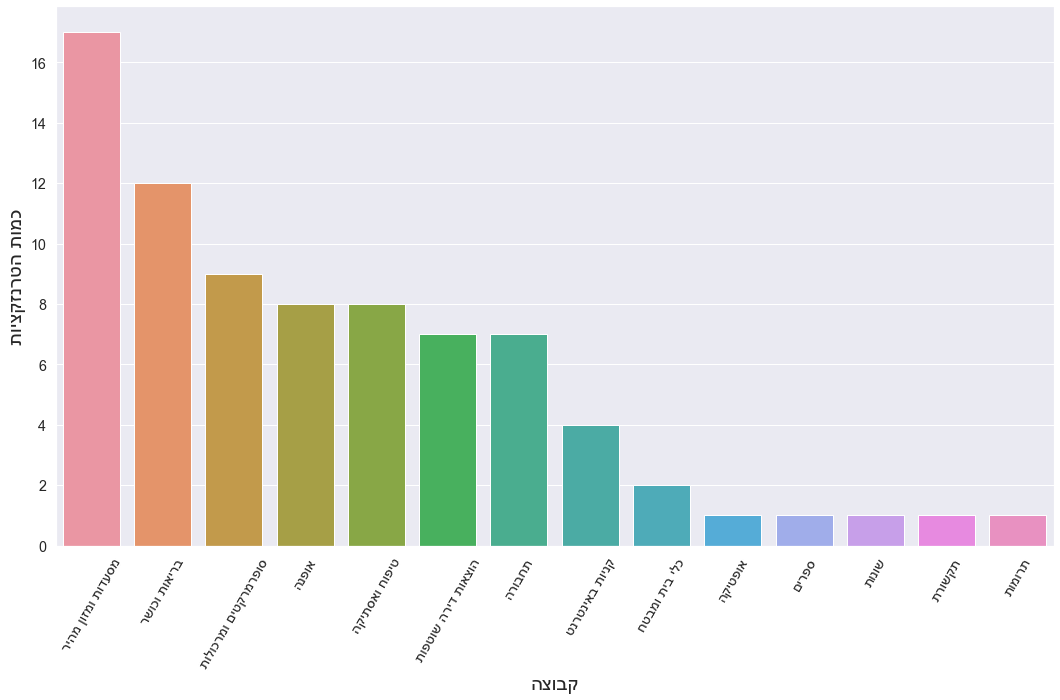

In [84]:
from bidi.algorithm import get_display
import matplotlib.pyplot as plt

n_category = df_profile.groupby("קבוצה")['קבוצה'].count().rename("Count").reset_index()

n_category.sort_values(by=["Count"], ascending=False, inplace=True)

sns.set(font_scale=1.3) 

plt.figure(figsize=(15,10))

bar = sns.barplot(x=n_category['קבוצה'].apply(lambda x: get_display(x)), y="Count",data=n_category)

bar.set_xticklabels(bar.get_xticklabels(), rotation=60)

plt.ylabel(get_display('כמות הטרנזקציות'), fontdict={'fontsize':20})
plt.xlabel(get_display('קבוצה'), fontdict={'fontsize':20})
plt.tight_layout()

### תובנות מתוך הגרף
#### - ניתן לראות מהגרף שהלקוח מוציא הרבה כסף על בילויים וטיפוח
#### - אין לו הוצאות על גנים/בתי ספר לפיכך כבר בשלב הזה ניתן להבין שללקוח אין ילדים
#### - קיימות הוצאות על דירה (בשלב הזה עוד לא ברור אם הדירה בבעלותו)
#### - קיימות הוצאות על תחבורה (כרגע לא ברור אם בבעלותו רכב) 

## נריץ מודל נוסף שמטרתו למצוא מידע נוסף על הלקוח

In [116]:
df_profile['תת קבוצה'] = df[['תת קבוצה']].copy()
df_profile

,תאריך חיוב,שם בית העסק,סכום עסקה,סכום חיוב,מס' תשלומים,תשלום מס,קבוצה,תת קבוצה
0,01/03/2019,חב' חשמל,911.60,911.60,1,1,הוצאות דירה שוטפות,חשמל
1,01/06/2018,סופר פארם,186.78,186.78,1,1,טיפוח ואסתיקה,טיפוח
2,01/06/2018,זארה,389.00,389.00,1,1,אופנה,ביגוד
3,02/04/2019,קפה מונטיפיורי,73.00,73.00,1,1,מסעדות ומזון מהיר,בתי קפה
4,02/09/2018,דואלי מכונות אוטומטיות,6.40,6.40,1,1,שונות,שונות
5,02/10/2018,זארה,190.00,190.00,1,1,אופנה,ביגוד
6,02/12/2018,בלונז'רי 96,108.08,108.08,1,1,מסעדות ומזון מהיר,בתי קפה
7,03/09/2018,מקס סטוק,35.00,35.00,1,1,כלי בית ומבטח,כלי בית ומבטח
8,03/10/2018,סוסו ובניו,38.00,38.00,1,1,מסעדות ומזון מהיר,מזון מהיר
9,04/01/2019,הוט,130.00,130.00,1,1,הוצאות דירה שוטפות,כבלים


<Figure size 1080x720 with 0 Axes>

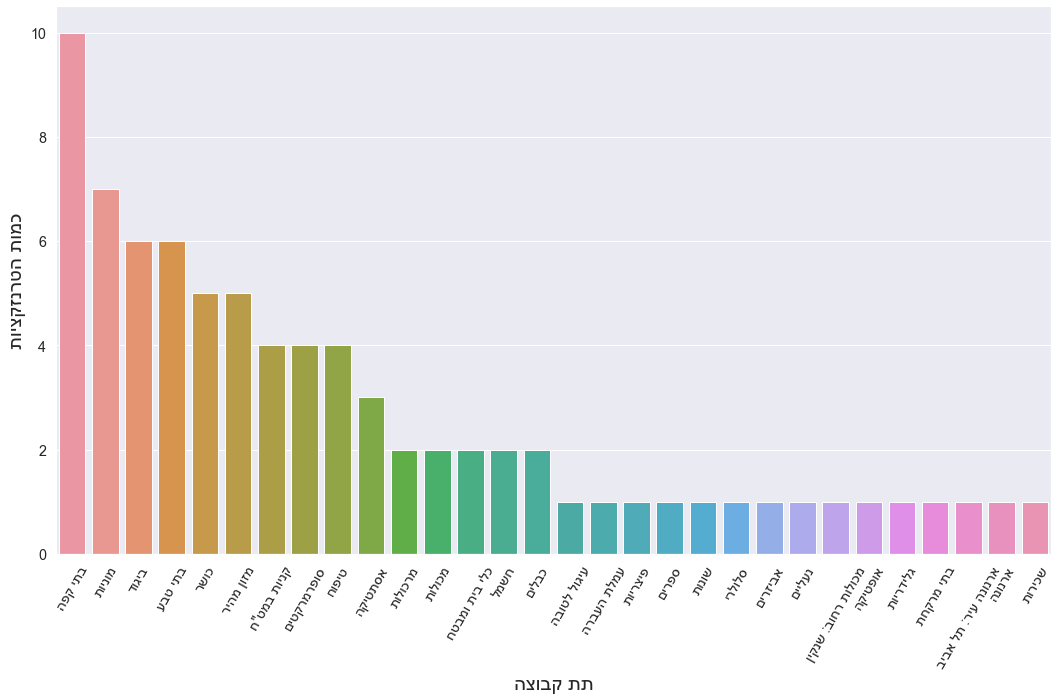

In [109]:
plt.figure(figsize=(15,10))

n_category = df_profile.groupby("תת קבוצה")['תת קבוצה'].count().rename("Count").reset_index()

n_category.sort_values(by=["Count"], ascending=False, inplace=True)

sns.set(font_scale=1.3) 

plt.figure(figsize=(15,10))

bar = sns.barplot(x=n_category['תת קבוצה'].apply(lambda x: get_display(x)), y="Count",data=n_category)

bar.set_xticklabels(bar.get_xticklabels(), rotation=60)

plt.ylabel(get_display('כמות הטרנזקציות'), fontdict={'fontsize':20})
plt.xlabel(get_display('תת קבוצה'), fontdict={'fontsize':20})
plt.tight_layout()


### תובנות מתוך הגרף
#### - ניתן להניח כי ללקוח אין דירה בבעלות כי קיימת טרנזקציה על שכירות - הבנק יכול לשקול להציאה ללקוח משכנתא
#### - לפי ניתוח טקסטואלי מצאנו שלקוח גר בתל אביב - הבנק יכול להפנות אותו לסניף הכי קרוב עליו לצורך קביעת פגישה בנושא משכנתא
#### - אנו רואים שללקוח אין רכב בבעלותו משום שאין הוצאות על דלק וקיימות הוצאות על מוניות - הבנק יכול לשקול להציא ללקוח הלוואה לקניית רכב
#### - על סמך כמות טרנזקציות הקשורות למקומות בילוי ניתן להניח שלקוח הוא בגיל צעיר
#### - ניתן לראות שללקוח אין הוצאות על לימודים ולפיכך ניתן להניח כי אינו סטודנט
#### - לא קיימות טרנזקציות של הלוואות

In [111]:
dict_pred = {"age": [26],
             "student": [0],
             "marital_single": [1],
             "balance": [20000],
             "housing": [0],
             "loan": [0]
            }
X_new = pd.DataFrame.from_dict(dict_pred)
X_new

,age,student,marital_single,balance,housing,loan
0,26,0,1,20000,0,0
